# Карта метода

## 1. Название метода
DecisionTreeClassifier (англ. «классификатор дерева решений») — это структура данных для классификации деревом решений.

## 2. Описание метода
Он основан на концепции решающих деревьев, которые представляют собой структуру в виде дерева, где каждый узел представляет собой "вопрос" о характеристиках данных, а каждое ребро - ответ на этот вопрос, приводящий к следующему узлу или конечному результату. 
Вот основные характеристики и принципы работы DecisionTreeClassifier:  
1. **Разделение данных**: Алгоритм работает путем разделения набора данных на более чистые подгруппы по одной из характеристик. 
Этот процесс продолжается до тех пор, пока каждая подгруппа не станет однородной по отношению к целевой переменной или пока не будет достигнут критерий остановки.  
2. **Выбор разделения**: При каждом шаге алгоритм выбирает характеристику, которая максимально разделяет данные на две части. 
Для этого используются различные критерии, такие как индекс Джини или энтропия Шеннона.  
3. **Построение дерева**: На каждом уровне дерева алгоритм выбирает характеристику и пороговое значение, которые максимизируют чистоту разделения. Затем данные разделяются на две части в соответствии с этим разделением, и этот процесс повторяется для каждой подгруппы до достижения критерия остановки.  
4. **Предотвращение переобучения**: Для предотвращения переобучения, DecisionTreeClassifier использует различные методы, такие как ограничение глубины дерева, установка минимального количества объектов в листе или использование обрезки дерева.  
5. **Прогнозирование класса**: После построения дерева алгоритм может прогнозировать класс (или категорию) нового объекта, проходя от корня дерева к листьям на основе его характеристик. 

##  3. Критерий для измерения качества разделения.
* Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом: $ S = -\sum_{i=1}^{N}p_i \log_2{p_i},$


где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

	
###### Изначально классы в данных перемешаны. Целью модели является отделить их друг от друга. Поэтому правила для разделения выборки строятся так, чтобы уменьшать энтропию в этой выборке. Высокой энтропии соответствует маленький прирост информации; низкой энтропии, наоборот, большой прирост информации.
###### В основе популярных алгоритмов построения дерева решений лежит принцип жадной максимизации прироста информации: на каждом шаге выбирается тот признак, при разделении по значению которого выборки прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине. В итоге узлы (условия) с менее низкой энтропией располагаются выше по дереву. Это позволяет дереву максимально эффективно пропускать входные данные через ряд условий к правильному конечному узлу («листу»).

* Неопределенность Джини (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$. Максимизацию этого критерия можно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве

## 4. Преимущества метода и недостатки
Преимущества DecisionTreeClassifier включают в себя простоту интерпретации и понимания полученных результатов, возможность обработки как числовых, так и категориальных данных, а также способность автоматически выявлять важные характеристики.

Однако есть и недостатки, такие как склонность к переобучению на сложных данных и к нестабильности в предсказаниях из-за чувствительности к небольшим изменениям в данных.

## 5. Применение в контексте нашей задачи
Классификация и предсказание категорий объектов на основе их характеристик. Определение класса заболевания на основе медицинских признаков пациента

# Реализация

## Импорт библиотек

In [1]:
import pandas as pd
import eli5
import numpy as np
import shap
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from eli5.sklearn import PermutationImportance

In [2]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

## Чтение данных

In [3]:
df = pd.read_excel('../data/dataset.xlsx')
dataset = df.copy()

## Предобработка

In [4]:
categorial_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

In [5]:
dataset[categorial_features] = pd.get_dummies(dataset[categorial_features], drop_first=True)

X = dataset.drop(['Больной'], axis=1)
y = dataset['Больной']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=SEED,
                                                    stratify=y,
                                                    shuffle=True)

In [6]:
scaler = StandardScaler()

X_std = X.copy()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler.fit(X_train[numerical_features])

X_train_std[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_std[numerical_features] = scaler.transform(X_test[numerical_features])
X_std[numerical_features] = scaler.transform(X[numerical_features])

## Поиск лучших гиперпараметров

In [7]:
clf = DecisionTreeClassifier(random_state=SEED)
parameters = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 4, 5, 6, 7, 8, 9]}
clf = GridSearchCV(clf,
                   parameters,
                   cv=5)
clf.fit(X_std, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [8]:
clf.best_params_, clf.best_score_

({'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'},
 0.9326086956521739)

## Обучение лучшей модели

In [9]:
tree = DecisionTreeClassifier(**clf.best_params_, random_state=SEED)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42,
                       splitter='random')

## Метрики

Accuracy
Самая простая метрика — отношение числа правильных ответов к размеру тестовой выборки — называется accuracy (англ. «правильность»), в некоторых переводах — «доля правильных ответов». Рассчитывается по формуле:  
<p style="text-align: center;">accuracy = (всего вопросов - количество ошибок) / всего вопросов</p>

Best val acc score:  0.8552631578947368


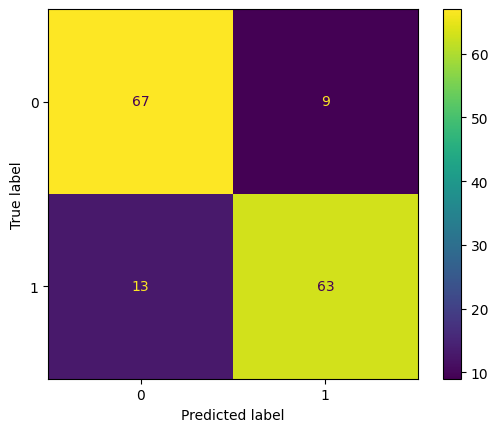

In [10]:
y_pred = tree.predict(X_test_std)

acc = accuracy_score(y_test, y_pred)
print('Best val acc score: ', acc)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();

# Интерпретация

## Отображение дерева

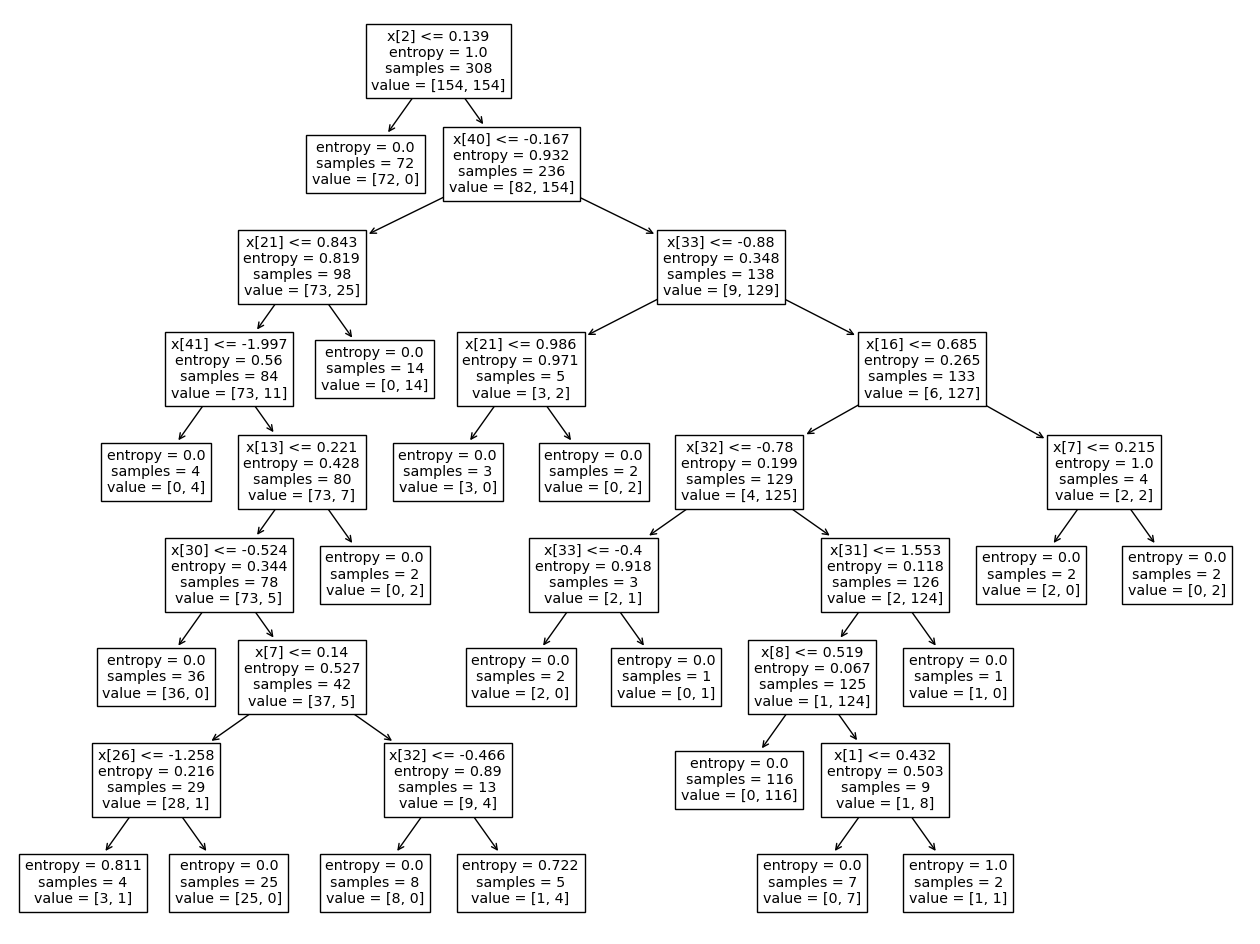

In [11]:
plt.figure(figsize=(16, 12))
plot_tree(tree);

## SHAP

In [19]:
explainer = shap.Explainer(clf.best_estimator_)
shap_values = explainer(X_test_std)
shap_values.data = X_test

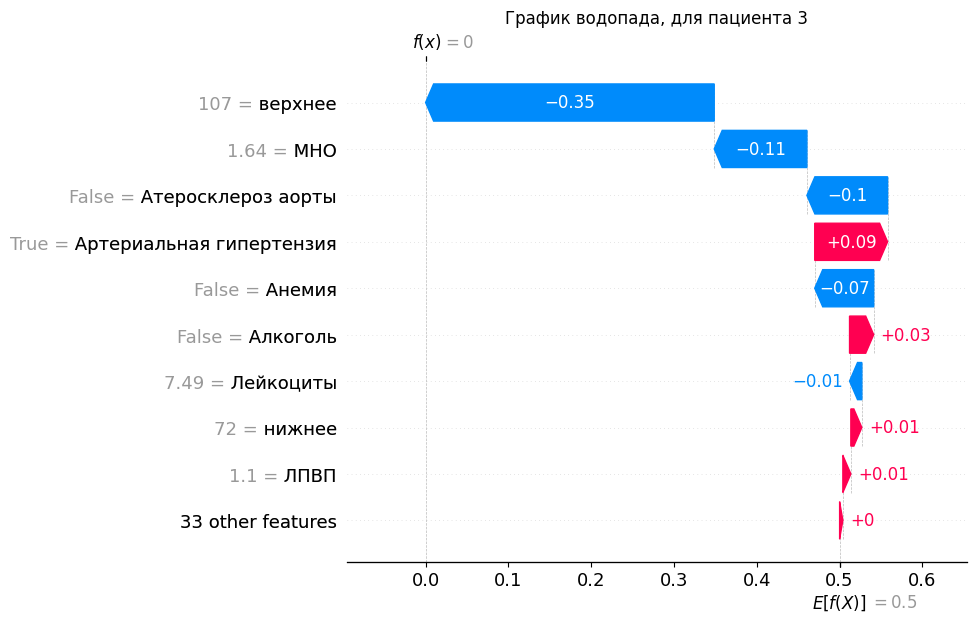

In [20]:
id_to_explain = 3
output_to_explain = 1

shap.plots.waterfall(shap_values[id_to_explain,:,output_to_explain], show=False)
plt.title(f'График водопада, для пациента {id_to_explain}')
plt.show()

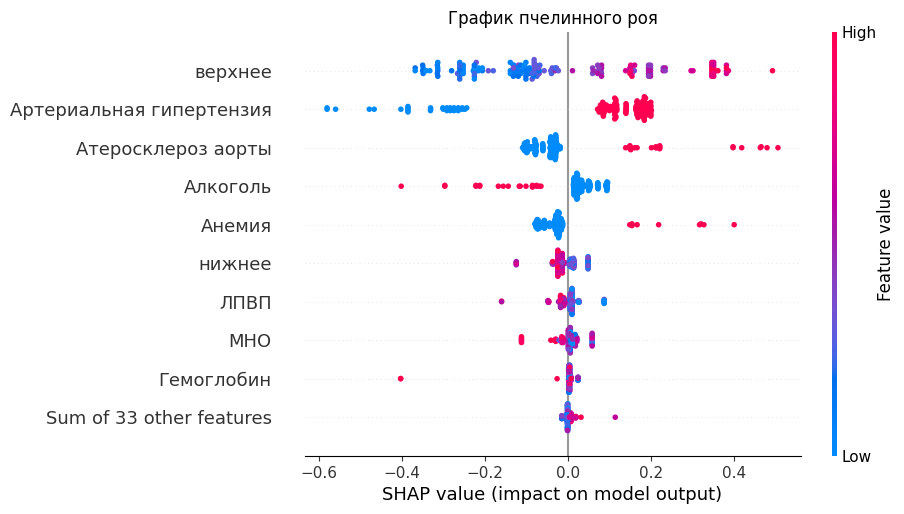

In [21]:
shap.plots.beeswarm(shap_values[:,:,1], show=False)
plt.title('График пчелинного роя')
plt.show()

Высокое верхнее давление, атеросклероз аорты, точечно анемия - повышают прогнозируемое наличие заболевания. Обратная ситуация с алкоголем, тк большинство больных его не употребляет.

*Каждая горизонтальная линия соответствует одному признаку, и на этой линии отмечаются точки, соответствующие тестовым примерам: кордината точки на линии соответствует SHAP value, цвет точки - значению признака. Если в каком-то участке линии не хватает места для всех точек, линия начинает расти в ширину. Таким образом, для каждого признака схема представляет собой слившееся множество точек, по одной точке для каждого примера

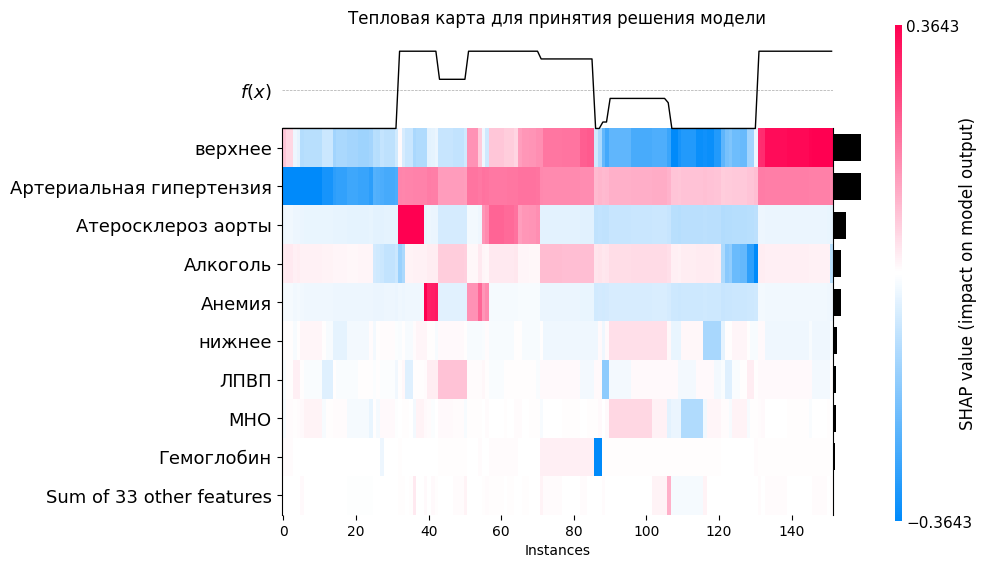

In [22]:
shap.plots.heatmap(shap_values[:,:,1], show=False)
plt.title('Тепловая карта для принятия решения модели')
plt.show()

## Eli5

### Объяснение предсказаний

In [23]:
element_n = 1

eli5.sklearn.explain_prediction_sklearn(tree, doc=X_test_std.iloc[element_n])

Explanation(estimator="DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42,\n                       splitter='random')", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='RDW_э', weight=0.5347826086956522, std=None, value=-1.2124462078557787), FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='Анемия', weight=0.4, std=None, value=False)], neg=[FeatureWeight(feature='верхнее', weight=-0.28224023581429625, std=None, value=-0.00849274465471568), FeatureWeight(feature='Артериальная гипертензия', weight=-0.15254237288135591, std=None, value=True)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Важность фич

In [24]:
eli5.sklearn.explain_weights_sklearn(tree, feature_names=X_std.columns.tolist())

Weight,Feature
0.3062,верхнее
0.2945,Артериальная гипертензия
0.1274,Анемия
0.0539,MCV
0.0428,нижнее
0.0355,RDW_э
0.0276,ИБС
0.0249,Атеросклероз аорты
0.0214,Эритроциты
0.0186,Алкоголь


### Важность перестановки

In [25]:
perm = PermutationImportance(estimator=tree, random_state=SEED).fit(X_test_std, y_test)
eli5.show_weights(perm, feature_names = X_test_std.columns.tolist())

Weight,Feature
0.1000 ± 0.0357,Артериальная гипертензия
0.0684 ± 0.0490,верхнее
0.0500 ± 0.0229,RDW_э
0.0368 ± 0.0134,Атеросклероз аорты
0.0263 ± 0.0186,Эритроциты
0.0145 ± 0.0226,Анемия
0.0132 ± 0.0204,MCV
0.0132 ± 0.0311,ИБС
0.0132 ± 0.0276,Лейкоциты
0.0092 ± 0.0134,Алкоголь
